1/10, error=0.18283431302244008
2/10, error=0.05502379994461655
3/10, error=0.05437964971509379
4/10, error=0.054225436728136234
5/10, error=0.054180111523151164
6/10, error=0.05417752812927652
7/10, error=0.05417603919591346
8/10, error=0.05416961006090073
9/10, error=0.05416354683434257
10/10, error=0.05415085039572862


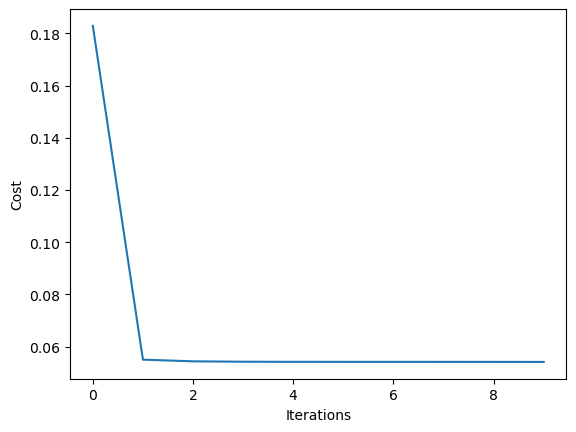

error: 0.05355899643775143
pred: 7 	true: 7
pred: 6 	true: 2
pred: 1 	true: 1
pred: 0 	true: 0
pred: 4 	true: 4
pred: 1 	true: 1
pred: 4 	true: 4
pred: 9 	true: 9
pred: 6 	true: 5
pred: 7 	true: 9
pred: 0 	true: 0
pred: 6 	true: 6
pred: 9 	true: 9
pred: 0 	true: 0
pred: 1 	true: 1
pred: 3 	true: 5
pred: 9 	true: 9
pred: 7 	true: 7
pred: 3 	true: 3
pred: 4 	true: 4
pred: 7 	true: 9
pred: 6 	true: 6
pred: 6 	true: 6
pred: 5 	true: 5
pred: 4 	true: 4
pred: 0 	true: 0
pred: 7 	true: 7
pred: 4 	true: 4
pred: 0 	true: 0
pred: 1 	true: 1
pred: 3 	true: 3
pred: 1 	true: 1
pred: 3 	true: 3
pred: 6 	true: 4
pred: 7 	true: 7
pred: 2 	true: 2
pred: 7 	true: 7
pred: 1 	true: 1
pred: 3 	true: 2
pred: 1 	true: 1
pred: 1 	true: 1
pred: 7 	true: 7
pred: 4 	true: 4
pred: 1 	true: 2
pred: 3 	true: 3
pred: 3 	true: 5
pred: 3 	true: 1
pred: 2 	true: 2
pred: 4 	true: 4
pred: 4 	true: 4
pred: 6 	true: 6
pred: 3 	true: 3
pred: 5 	true: 5
pred: 3 	true: 5
pred: 6 	true: 6
pred: 0 	true: 0
pred: 4 	true: 4
pred

In [8]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
from Dense import Dense
from Activations import Tanh
from Losses import mse, mse_prime
from Network import train, predict

def preprocess_data(x, y, limit):
    # reshape and normalize input data
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype("float32") / 255
    # encode output which is a number in range [0,9] into a vector of size 10
    # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    y = np_utils.to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[:limit], y[:limit]


# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 60000)
x_test, y_test = preprocess_data(x_test, y_test, 10000)

# neural network
network = [
    Dense(28 * 28, 40, regularization=0.01),
    Tanh(),
    Dense(40, 10, regularization=0.01),
    Tanh()
]

# train
costs = train(network, mse, mse_prime, x_train, y_train, epochs=10, batch_size = 2, learning_rate=0.01)

# plot costs
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# calculate error on test set
error = 0
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    error += mse(y, output)
error /= len(x_test)
print("error:", error)


# test
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    print('pred:', np.argmax(output), '\ttrue:', np.argmax(y))
